## Load required modules

In [1]:
# External libraries
import numpy as np
import pandas as pd
import pygal
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import importlib
import svgutils
from svgutils.compose import *
import os.path
#import svgwrite

# Custom code
from fx_RNAseq import *
def findgene(genename):
    dPath = "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/" #directory path
#     fPath = "00_rodsVcones/rodVCones_raw.csv" #file path
    fPath = "00_rodsVcones/rodVCones_fpkm.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist(genename):
    dPath = "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/" #directory path
#     fPath = "00_rodsVcones/rodVCones_raw.csv" #file path
    fPath = "00_rodsVcones/rodVCones_fpkm.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

# def findgene(genename):
#     !head -1 ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/00_rodsVcones/rodVCones_raw.csv > ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt
#     # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
#     !grep -w ^$genename ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/00_rodsVcones/rodVCones_raw.csv >> ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt
#     gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt")
    
#     return gdf

# def findgenelist(genename):
#     !head -1 ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/00_rodsVcones/rodVCones_raw.csv > ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt
#     # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
#     !grep ^$genename ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/00_rodsVcones/rodVCones_raw.csv >> ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt
#     gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt")
#     return gdf

def plotNReads():
    rdf = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/nMappedReads.csv")
    h = rdf.iloc[:,1]
    h = h / 1e6
    n = np.arange(1,7) # Rods
    n = np.append(n, 6.5 + np.arange(1,6)) # UV
    n = np.append(n, 12 + np.arange(1,7)) # S
    n = np.append(n, 18.5 + np.arange(1,8)) # M
    n = np.append(n, 26 + np.arange(1,7)) # L
    return n, h

def plotBars(genename):
    gdf = findgene(genename)
    n = np.arange(1,7) # Rods
    n = np.append(n, 6.5 + np.arange(1,6)) # UV
    n = np.append(n, 12 + np.arange(1,7)) # S
    n = np.append(n, 18.5 + np.arange(1,8)) # M
    n = np.append(n, 26 + np.arange(1,7)) # L
    h_start = 7
    h_end = 37
    h = gdf.iloc[0,h_start:h_end]
    return n, h

def plotBars_list(genelist):
    n=[]
    h=[]
    for i,gene in enumerate(genelist, start=0):
        tempn, temph = plotBars(gene)
        n = np.append(n,tempn+(30*i))
        h = np.append(h,temph)
    return n, h

def svgreload():
    !osascript -e 'tell application "Google Chrome" to tell the active tab of second window to reload'

from pygal.style import Style
custom_style = Style(
    background = 'black',
    plot_background = '#111111',
    foreground = '#999999',
    foreground_strong = '#eeeeee',
    foreground_subtle = '#555555',
    opacity = '.8',
    opacity_hover = '.4',
    transition = '10ms',
    colors = ('#747474','#B540B7', '#4669F2','#04CD22','#CC2C2A'),
    label_font_size = 24,
    major_label_font_size = 24,
    title_font_size = 24,
    legend_font_size = 18
)

#photoreceptor Colors
pC = {
    'r' : '#747474',
    'u' : '#B540B7',
    's' : '#4669F2',
    'm' : '#04CD22',
    'l' : '#CC2C2A',
    'plt' : '',
}

pC['plt']=[
    pC['r'],pC['r'],pC['r'],pC['r'],pC['r'],pC['r'],
    pC['u'],pC['u'],pC['u'],pC['u'],pC['u'],
    pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],
    pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],
    pC['l'],pC['l'],pC['l'],pC['l'],pC['l'],pC['l']
]

def findgene_glia(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "glia8dpf_DEGcounts.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_glia(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "glia8dpf_DEGcounts.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_glia(genename):
    gdf = findgene_glia(genename)
    n = np.arange(1,19) # GFP+
    n = np.append(n, 19.5 + np.arange(1,19)) # GFP-
    h_start = 5
    h_end = 41
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end]
    return n, h

#glia Colors
gC = {
    'm48' : '#c7ffec',
    'm60' : '#94ffdb',
    'm72' : '#57ffc7',
    'm96' : '#2effb9',
    'm120': '#05ffac',
    'm192': '#00d68f',
    
    'c48' : '#e3e3e3',
    'c60' : '#c9c9c9',
    'c72' : '#ababab',
    'c96' : '#969696',
    'c120': '#828282',
    'c192': '#6b6b6b',
    
    'plt' : '',
}

gC['plt']=[
    gC['m48'],gC['m48'],gC['m48'],
    gC['m60'],gC['m60'],gC['m60'],
    gC['m72'],gC['m72'],gC['m72'],
    gC['m96'],gC['m96'],gC['m96'],
    gC['m120'],gC['m120'],gC['m120'],
    gC['m192'],gC['m192'],gC['m192'],
    gC['c48'],gC['c48'],gC['c48'],
    gC['c60'],gC['c60'],gC['c60'],
    gC['c72'],gC['c72'],gC['c72'],
    gC['c96'],gC['c96'],gC['c96'],
    gC['c120'],gC['c120'],gC['c120'],
    gC['c192'],gC['c192'],gC['c192'],
]

def findgene_rods(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfRods_Sun2018/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "zfRods.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_rods(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfRods_Sun2018/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "zfRods.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_rods(genename):
    gdf = findgene_rods(genename)
    n = np.arange(1,5) # GFP+
    n = np.append(n, 4.5 + np.arange(1,5)) # GFP-
    h_start = 7
    h_end = 15
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#rod Colors
rC = {
    'r' : '#747474',
    'c': '#dac910',
    'plt' : '',
}

rC['plt']=[
    rC['r'],rC['r'],rC['r'],rC['r'],
    rC['c'],rC['c'],rC['c'],rC['c'],
]

def findgene_sqcones(genename):
    dPath = "~/Documents/LiLab/RNAseq/sqCones_Kunze/" #directory path
    fPath = "sqConesAwHib_Adult.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_sqcones(genename):
    dPath = "~/Documents/LiLab/RNAseq/sqCones_Kunze/" #directory path
    fPath = "sqConesAwHib_Adult.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_sqcones(genename):
    gdf = findgene_sqcones(genename)
    n = np.arange(1,8) # GFP+
    n = np.append(n, 7.5 + np.arange(1,7)) # GFP-
    h_start = 8
    h_end = 21
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#squirrel Colors
sqC = {
    's' : '#4669F2',
    'sHib' : '#548ced',
    'm' : '#04CD22',
    'mHib' : '#53e477',
    'plt' : '',
}

sqC['plt']=[
    sqC['s'],sqC['s'],sqC['s'],sqC['s'],sqC['s'],
    sqC['sHib'],sqC['sHib'],
    sqC['m'],sqC['m'],sqC['m'],
    sqC['mHib'],sqC['mHib'],sqC['mHib'],
]


def findgene_haircell(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfHairCells_Mattern2018/" #directory path
    fPath = "zfHairCells_rpkm.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_haircell(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfHairCells_Mattern2018/" #directory path
    fPath = "zfHairCells_rpkm.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_haircell(genename):
    gdf = findgene_sqcones(genename)
    n = np.arange(1,4) # riboTagged
    n = np.append(n, 3.5 + np.arange(1,4)) # Whatever this is
    h_start = 2
    h_end = 8
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#hairCell Colors
hcC = {
    'h' : '#e147c0',
    'c' : '#dac910',
    'plt' : '',
}

hcC['plt']=[
    hcC['h'],hcC['h'],hcC['h'],
    hcC['c'],hcC['c'],hcC['c'],
]

print('LOADED')

LOADED


In [2]:
# %cd ~/Dropbox/Presentations/RevealReboot/resources/20191002_RNAseq/
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/genePlots/fpkm/

/Users/angueyraaristjm/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/genePlots/fpkm


In [3]:
# dark background
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
         "axes.linewidth" : 3,
         "xtick.major.width" : 3,
         "ytick.major.width" : 3,
         "xtick.major.size" : 8,
         "ytick.major.size" : 8,
         "text.color" : "w"}
plt.rcParams.update(params)

In [ ]:
# white background
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k",
         "axes.linewidth" : 3,
         "xtick.major.width" : 3,
         "ytick.major.width" : 3,
         "xtick.major.size" : 8,
         "ytick.major.size" : 8,
         "text.color" : "w"}
plt.rcParams.update(params)

***
# Index <a id='Index'>∮</a>
***
- [Plot Total Number of Reads](#nReads)
- [PCA Plots](#pcaPlots)
- [BarPlot: Opsins](#barOpsins)
- [BarPlot: Custom](#barCustom)
- [BarPlot: Many Genes](#barMany)
- [BarPlot_subPlotsAutomatic: Custom](#barManyAuto)
- [Heatmap: Opsins](#heatOpsins)
- [Heatmap: Custom](#heatCustom)
- [Heatmap: Other Data Sets](#heatOther)
- [Sparkline plots](#sparkline)
- [PCA](#pca)
- [GO clustering](https://go.princeton.edu/) 
***

***
## Total number of reads<a id='nReads'>∮</a>
***
[Back to Index](#Index)

### pygal version (does not import well into Intaglio)
> hist = pygal.Histogram(x_title='',y_title='million of mapped reads',show_x_labels=False,title='',style=custom_style,legend_at_bottom=True,legend_at_bottom_columns=4,show_legend=False)  
> hist.add('Rod',[(11.27,0.2,0.8),(11.77,1.2,1.8),(9.4,2.2,2.8),(14.99,3.2,3.8),(9.75,4.2,4.8),(9.08,5.2,5.8),])  
> hist.add('UV',[(9.42,6.2,6.8),(6.52,7.2,7.8),(10.45,8.2,8.8),(9.46,9.2,9.8),(11.02,10.2,10.8)])  
> hist.add('S',[(9.23,11.2,11.8),(9.33,12.2,12.8),(9.37,13.2,13.8),(14.95,14.2,14.8),(12.85,15.2,15.8),(10.96,16.2,16.8)])  
> hist.add('M',[(10.40,18.2,18.8),(8.634,19.2,19.8),(7.36,20.2,20.8),(10.32,21.2,21.8),(8.33,22.2,22.8),(9.53,23.2,23.8),(9.526,17.2,17.8)])  
> hist.add('L',[(8.99,24.2,24.8),(10.50,25.2,25.8),(10.03,26.2,26.8),(11.08,27.2,27.8),(10.44,28.2,28.8),(10.72,29.2,29.8)])  
> hist.render_to_file('test.svg')

In [ ]:
#pyplot version (Sep_2019)
plotname = ''
n,h = plotNReads()
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure_nReads(plotname, fH, ax, pH)
plt.tight_layout()
plt.savefig("{0}.svg".format('nReads'), transparent=True, format="svg")

In [ ]:
np.mean(h)

***
## pcaPlots<a id='pcaPlots'>∮</a>
***
[Back to Index](#Index)

In [ ]:
def formatFigure_pca(plotname, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    
    axH.ticklabel_format(style='sci',axis='y',scilimits=(0,4))
    axH.ticklabel_format(style='sci',axis='x',scilimits=(0,4))
    axH.set_title(plotname, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (axH.get_xticklabels() + axH.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.tick_params(axis = 'both', which = 'major', labelsize = 18)
    axH.xaxis.offsetText.set_fontsize(18)
    axH.yaxis.offsetText.set_fontsize(18)

In [ ]:
#pyplot version (Sep_2019)
plotname = 'PCA_RodsCones'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_rodsVcones/pcaData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[5,5])
pH = plt.scatter(pc1, pc2, color=pC['plt'])
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 21%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 9%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-100,50)
plt.ylim(-60,60)
plt.tight_layout()
plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
#pyplot version (Sep_2019)
plotname = 'PCA_UVS_ML'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_USvsLM/pcaData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[5,5])
pH = plt.scatter(pc1, pc2, color=[
    pC['u'],pC['u'],pC['u'],pC['u'],pC['u'],
    pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],
    pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],
    pC['l'],pC['l'],pC['l'],pC['l'],pC['l'],pC['l']
]
                )
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 13%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 10%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-80,80)
plt.ylim(-60,60)
plt.tight_layout()
plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
#pyplot version (Sep_2019)
plotname = 'PCA_ML'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_LvsM/pcaData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[5,5])
pH = plt.scatter(pc1, pc2, color=[
    pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],
    pC['l'],pC['l'],pC['l'],pC['l'],pC['l'],pC['l']
]
                )
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 23%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 10%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-80,80)
plt.ylim(-80,80)
plt.tight_layout()
plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
#pyplot version (Sep_2019)
plotname = 'PCA_U_S'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_UvsS/pcaData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[5,5])
pH = plt.scatter(pc1, pc2, color=[
    pC['u'],pC['u'],pC['u'],pC['u'],pC['u'],
    pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],
]
                )
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 13%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 10%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-100,100)
plt.ylim(-80,80)
plt.tight_layout()
plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
# US vs LM: PC1 = 13% and PC2 = 10%
# M vs L: PC1 = 23% and PC2 = 10%
# UV vs S: PC1 = 15% and PC2 = 13%

### tSNE plot

In [ ]:
#pyplot version (Sep_2019)
plotname = 'tSNE'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/tSNEData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[6,6])
pH = plt.scatter(pc1, pc2, color=pC['plt'])
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('tSNE1', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('tSNE2', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_xticks([-1000,-500,0,500,1000])
ax.set_yticks([-1000,-500,0,500,1000])
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)
plt.tight_layout()
plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

***
## barPlot: Opsins<a id='barOpsins'>∮</a>
***
[Back to Index](#Index)

In [ ]:
# from fx_RNAseq import *

In [ ]:
genename = 'opn1lw1'
n,h = plotBars(genename)
h = h
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure_Opsins(genename, fH, ax, pH)
plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

In [ ]:
findgene('rho')

***
## barPlot: Custom Gene<a id='barCustom'>∮</a>
***
[Back to Index](#Index)

> Genes to pay attention to but still haven't given interesting results
> cdh (cadherins)
> protocadherins
> semaphorins
> plexins (plx)
> laminins (lamb) and integrins (itg)
> dystroglycan (dag), dystrophin (dmd), pikachurin
> neurexins
> cadm
> dscam and sidekicks (sdk)
> pappaa


In [ ]:
gdf = findgenelist('lrit')
gdf

In [ ]:
genename = 'foxq2'
# genename = 'ncdn'
# genename = 'chn2'
# genename = 'grin1b'
# genename = 'cdhr1a'
# genename = 'lrit1a'
n,h = plotBars(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure(genename, fH, ax, pH)
plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

***
## barPlot: Many Genes Layout<a id='barMany'>∮</a>
***
[Back to Index](#Index)

In [ ]:
cd '~/Dropbox/LiLab/RNAseq/genePlots/combos'

In [ ]:
genelist = ['gnat1','gnat2']
n, h = plotBars_list(genelist)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure_list(genelist, fH, ax, pH)
# plt.savefig("{0}.svg".format('gnat'), transparent=True, format="svg")

In [ ]:
genelist = ['rho','opn1sw1','opn1sw2','opn1mw1','opn1mw2','opn1mw3','opn1mw4','opn1lw1','opn1lw2']
n, h = plotBars_list(genelist)
fH, ax = plt.subplots(figsize=[6*len(genelist),4])
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure_list(genelist, fH, ax, pH)
plt.xlim(0,len(genelist)*10)
# plt.savefig("{0}.svg".format('opn1'), transparent=True, format="svg")

***
## barPlot: Many Genes Layout Using Subplots (proper way)<a id='barManySubPlots'>∮</a>
***
[Back to Index](#Index)

In [ ]:
shrink = 1#2/3

In [ ]:
genelist = ['gnat1','gnat2']
fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i]) 
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('gnat'), transparent=True, format="svg")

In [ ]:
genelist = ['rho','rhol']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
#         plt.ylim(0,3.5e6)
#         axes[0].set_yticks(np.arange(0, 4.0e6, step=0.5e6))
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('rho'), transparent=True, format="svg")

In [ ]:
genelist = ['opn1sw1','opn1sw1']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
#         plt.ylim(0,2e6)
#         axes[0].set_yticks(np.arange(0, 2.5e6, step=0.5e6))
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('opn1sw1'), transparent=True, format="svg")

In [ ]:
genelist = ['opn1mw1','opn1mw2']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('opn1mwA'), transparent=True, format="svg")

In [ ]:
genelist = ['opn1mw3','opn1mw4']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
        plt.ylim(0,1.0e5)
        axes[0].set_yticks(np.arange(0, 1.5e5, step=0.5e5))
    else:
        formatFigure_right(g, fH, axes[i], pH)


plt.savefig("{0}.svg".format('opn1mwB'), transparent=True, format="svg")

In [ ]:
genelist = ['opn1lw1','opn1lw2']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
        plt.ylim(0,1.0e5)
        axes[0].set_yticks(np.arange(0, 1.5e5, step=0.5e5))
    else:
        formatFigure_right(g, fH, axes[i], pH)
#         axes[i].set_yticks(np.arange(0, 2.0e6, step=0.5e6))

plt.savefig("{0}.svg".format('opn1lw'), transparent=True, format="svg")

In [ ]:
# Using svgutils to automatically tile these figures the right way
Figure("2400", "2000",
       SVG("rho.svg").move(0, 290*0),
       SVG("opn1sw.svg").move(0, 290*1),
       SVG("opn1mwA.svg").move(0, 290*2),
       SVG("opn1mwB.svg").move(0, 290*3),
       SVG("opn1lw.svg").move(0, 290*4)
        ).save("OpsinsAll.svg")
svgreload()

### Phototransduction

In [ ]:
gdf = findgenelist('gngt')
gdf = gdf.sort_values(by=['symbol'])
gdf

In [ ]:
# genelist = ['saga','sagb','arr3a','arr3b']
# plotName = 'arrestins'

# genelist = ['gnat1','gnat2']
# plotName = 'gnat'

# genelist = ['gngt1','gngt2a','gngt2b']
# plotName = 'gngt'

# genelist = ['gnb1a','gnb1b','gnb3a','gnb3b','gnb4b','gnb5a','gnb5b']
# plotName = 'gnb'

# genelist = ['pde6a','pde6b','pde6c','pde6d','pde6ga','pde6gb','pde6c','pde6ha']
# plotName = 'pde'

# genelist = ['gucy1a1','gucy1b1','gucy1b2','gucy2c','gucy2d','gucy2f','gucy2g']
# plotName = 'GC'

# genelist = ['gucy2d','gucy2f']
# plotName = 'GC_retinaSpecific'

# genelist = ['guca1a','guca1b','guca1c','guca1d','guca1e','guca1g']
# plotName = 'GCAP'

# genelist = ['cnga1a','cnga1b','cnga3a','cnga3b','cnga4','cnga2a','cnga2b']
# plotName = 'CNGalpha'

# genelist = ['cnga1a','cnga1b','cnga3a','cnga3b']
# plotName = 'CNGalpha_retinaSpecific'

# genelist = ['cngb1a','cngb3.1','cngb3.2']
# plotName = 'CNGbeta'


# genelist = ['rgs9a','rgs9b','rgs9bp',
#             'rgs3a','rgs6',
#             'rgs11','rgs12a','rgs16','rgs20']
# plotName = 'RGS'

# genelist = ['grk1a','grk1b',
#             'grk3',
#             'grk4','grk5','grk5l',
#             'grk6',
#             'grk7a','grk7b']
# plotName = 'GRK'

# genelist = ['rcvrna','rcvrnb','rcvrn2','rcvrn3','ncalda','ncaldb']
# plotName = 'rcvrn'



fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

### Others

In [ ]:
gdf = findgenelist('cacn')
gdf = gdf.sort_values(by=['symbol'])
gdf

In [ ]:
genelist = ['ctbp1','ctbp2a']
plotName = 'ctbp'

genelist = ['cadm1a','cadm1b','cadm2a','cadm2b','cadm3','cadm4']
plotName = 'cadm'

genelist = ['tjp1a','tjp1b','tjp2a','tjp2b','tjp3']
plotName = 'tjp'

genelist = ['nrxn1a','nrxn1b','nrxn2a','nrxn2b','nrxn3a','nrxn3b',]
plotName = 'nrxn'

genelist = ['eml1','eml2','eml3']
plotName = 'eml'

genelist = ['elfn1b','elfn2a']
plotName = 'elfn'

genelist = ['cpne1','cpne2','cpne3','cpne4a','cpne4b','cpne5a','cpne5b','cpne7','cpne8','cpne9']
plotName = 'cpne'

# genelist = ['tbx2a','tbx2b','tbxas1','tbx21']
genelist = ['tbx2a','tbx2b']
plotName = 'tbx2'

genelist = ['chn1','chn2']
plotName = 'chn'

genelist = ['ncdn','ncdn']
plotName = 'ncdn'

genelist = ['sema7a','sema6a','sema6d','sema4ab','sema4ba','sema3fa','sema3fb']
plotName = 'sema'

genelist = ['cacna1aa','cacna1ab',
            'cacna1da','cacna1db',
            'cacna1fa','cacna1fb',
            'cacna2d1a','cacna2d2a',
            'cacna2d4a','cacna2d4b',
            'cacna1sb',
           ]
plotName = 'CaV'

# genelist = ['stxbp1b','stxbp4','stxbp2','stxbp5a','stxbp5b','stxbp5l','stxbp3']
genelist = ['stxbp1a','stxbp1b',
            'stxbp2','stxbp3','stxbp4',
            'stxbp5a','stxbp5b','stxbp5l',
            'stxbp6','stxbp6l']
plotName = 'stxBP'

genelist = ['stx1a','stx1b','stx2a','stx2b','stx3a',
            'stx4','stx5a','stx5al','stx6','stx7l',
            'stx8','stx10','stx11a','stx11b.1','stx11b.2',
            'stx12','stx12l','stx16','stx17','stx18']
plotName = 'stx'

genelist = ['prickle1a','prickle1b','prickle2a','prickle2b','prickle3',]
plotName = 'prickle'

genelist = ['pcdh15a','pcdh15b','pcdh8','pcdh11','pcdh10a']
plotName = 'pdch'

genelist = ['chn1','chn2']
plotName = 'chn'


genelist = ['lrit1a','lrit1b','lrit2','lrit3a','lrit3b']
plotName = 'lrit'

genelist = ['pou4f1','pou4f2','pou4f3','rbpms','grm6a','grm6b','vsx2','gfap','prkca','syt2a','rpe65a', 'opn4']
plotName = 'controls'


# genelist = ['gpx1a','gpx1b','gpx4a','gpx4b']
# genelist = ['rgs9bp','RGS9BP']
# genelist = ['chchd1','chchd10']
# genelist = ['yipf6','yipf1']
# genelist = ['sema3fb','sema3fa','sema6d']
# genelist = ['esama','esamb']

# genelist = ['pcdh1gc6','tex264a']
# plotName = 'test'

            
fH, axes = plt.subplots(1,len(genelist),sharey=False,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

In [ ]:
gdf = findgenelist('opn1')
# gdf = gdf.sort_values(by=['symbol'])
# gdf = gdf.sort_values(by=['baseMean'], ascending=False)
# gdf['symbol']
gdf

### According to Neuhauss recoverin1a in enriched in rods and UV-cones

***
## heatMap: Opsins<a id='barManySubPlots'>∮</a>
***
[Back to Index](#Index)

Not sure this is helpful.  
Maybe use this to show differential expression by normalizing by mean expression in correct type

In [ ]:
gdf = findgenelist('opn1')
gdf2 = findgene('rho')
gdf2
gdf = gdf.append(gdf2)
gdf.index = range(len(gdf))
gdf

Opsins = ["Rhodopsin (rho)","UV-opsin (opn1sw1)", "S-opsin (opn1sw2)","M-opsin (opn1mw1)","M-opsin (opn1mw2)","M-opsin (opn1mw3)","M-opsin (opn1mw4)","L-opsin (opn1lw1)","L-opsin (opn1lw2)"]
Samples = ["","","R","","","",
           "","","U","","",
           "","","S","","","",
           "","","","M","","","",
           "","","L","","","",
          ]
Samples = [
          ]

data = gdf.iloc[0:9,7:37]
data = data.reindex([8,4,5,7,0,2,6,1,3])
data.index = range(len(data))
# np.around(np.divide(data.values,1e6),2)
# opsinData = np.divide(data.values,1e6)
opsinData = np.divide(data.values,1)

# # log2 representation does not work well
# log2matrix = np.vectorize(log2)
# opsinData = log2matrix(opsinData)

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
         "axes.linewidth" : 2,
         "xtick.major.width" : 2,
         "ytick.major.width" : 2,
         "xtick.major.size" : 0,
         "ytick.major.size" : 0}
plt.rcParams.update(params)

plotName = "heatMap_opsins"
fig, ax = plt.subplots()

im, cbar = heatmap(opsinData, Opsins, Samples, ax=ax,
                   cmap="inferno", cbarlabel="fpkm")


# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# fig.tight_layout()
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

***
## heatMap: Custom<a id='heatCustom'>∮</a>
***
[Back to Index](#Index)

In [ ]:
plotName = "test"

# gdf = findgene('rho')
# gdf2 = findgenelist('opn1sw')
# gdf = gdf.append(gdf2)
# gdf2 = findgenelist('opn1mw')
# gdf2 = gdf2.sort_values(by=["symbol"])
# gdf = gdf.append(gdf2)
# gdf2 = findgenelist('opn1lw')
# gdf2 = gdf2.sort_values(by=["symbol"])
# gdf = gdf.append(gdf2)

# gdf.index = range(len(gdf))
# plotName = "heatMap_opsins"

# gdf = findgenelist('slc24') -> NCKX transporter; slc25a5 is mitochondrial but known to express in eye
# plotName = "slc24"

# gdf = findgenelist('sema')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_sema"

# gdf = findgenelist('cdh')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# plotName = "heatMap_cdh"

# gdf = findgenelist('eph')
# gdf = gdf.drop([1,14,15,16]) #not ephrin receptors
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_eph"


# gdf = findgenelist('efn')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_efn"

# gdf = findgenelist('pdgf')
# gdf = findgenelist('rgr')
# gdf = findgenelist('lmo')
# gdf.index = range(len(gdf))
# gdf.sort_values(by=["log2FoldChange"])


## genes in 2019 Papal, Swaroop: # igsf11, epha10, tuft1, prtg, lrfn2, vasn

# gdf = findgenelist('igsf')
# gdf = findgenelist('tuft')
# gdf = findgenelist('prtg')
# gdf = findgenelist('lrfn')
# gdf = findgenelist('vasn')

# gdf = findgenelist('rdh')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "rdhHeatMap"

# gdf = findgenelist('cyp2')
# gdf = findgenelist('cyb')

# gdf = findgenelist('sag')
# plotName = "heatMap_sag"

# gdf = findgenelist('dio')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_dio"

# gdf = findgenelist('lrrn')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_lrrn"

# gdf = findgenelist('dnmt')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_dnmt"

# gdf = findgenelist('tet')

# gdf = findgenelist('isl')
# gdf = gdf.drop([1])

# gdf = findgenelist('gj')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_gj"

# gdf = findgenelist('fgf')
# gdf = findgenelist('bmp')
# gdf = findgenelist('fzd')
# gdf = findgenelist('edar')
# gdf = findgenelist('axin')

# gdf = findgenelist('cadm') # cadm2a in S-Cones probably(?) and cadm3 in all photoreceptors (Hunter, JCN, 2011)
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_cadm"

# gdf = findgenelist('lrit') # lrit1b for rods and cones; lrit2 for cones; lrit3 for rods
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_lrit"

# gdf = findgenelist('elfn') # not detected
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_elfn"

# gdf = findgenelist('tenm') # for RGCs in zebrafish (Antinucci, Cell Reports, 2013)

# gdf = findgenelist('foxo')

# gdf = findgenelist('sdk')

# gdf = findgenelist('crmp')



# Even More
# gdf = findgenelist('thr')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_thr"

# gdf = findgenelist('lingo')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_lingo"

# gdf = findgenelist('mitf')

# gdf = findgenelist('prickle')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_prickle"

# gdf = findgenelist('rdh')
# gdf = findgenelist('sdh')
# lingo, rx, mitf

# gdf = findgenelist('dag')
# can't find pikachurin: # gdf = findgenelist('egflam') gdf = findgenelist('si:dkeyp-100d11.2-001')

# gdf = findgenelist('kcn')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf = gdf.drop(np.arange(20,109))
# gdf

# gdf = findgenelist('kcnj')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf

# gdf = findgenelist('slc')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf = gdf.drop(np.arange(40,410))

# gdf = findgenelist('rcv')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_recoverin"

# gdf = findgenelist('sag')
# gdf = gdf.append(findgenelist('arrb'))
# gdf = gdf.append(findgenelist('arr3'))
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_arr"


# gdf = findgenelist('cng')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_cng"

# gdf = findgenelist('cnga')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_cnga"

# gdf = findgenelist('cngb')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_cngb"

# gdf = findgenelist('myo')
# gdf = gdf.sort_values(by=["symbol"])

# gdf = findgenelist('crx')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# plotName = "heatMap_crx"


# gdf = findgenelist('neurod')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_neurod"

# gdf = findgenelist('ror')
# gdf = gdf.drop([5,6])
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_ror"


# gdf = findgenelist('nr')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf = gdf.drop(np.arange(5,76))
# plotName = "heatMap_nrl"


# gdf = findgenelist('pcdh')
# gdf = gdf.drop([1]) #highest ones that obscure others.
# # gdf = gdf.drop([1,15]) #highest ones that obscure others.
# gdf = gdf[gdf.baseMean > .45]
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# plotName = "heatMap_pcdh_partial"

# gdf = findgenelist('hcn')
# gdf = gdf.sort_values(by=["symbol"])

# gdf = findgenelist('gabr')
# gdf = gdf.drop([0,2]) #highest ones that obscure others.
# gdf = gdf.sort_values(by=["symbol"])

# gdf = findgenelist('opn4')
# gdf = gdf.drop([1,2]) #highest ones that obscure others.
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf = gdf.drop(np.arange(5,76))
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_opn4"

# CSNB causes: Nyx, cacna1f, GPR179 (Kamermans, 2019)
# gdf = findgenelist('nyx') # bipolar cell -> not expressed in photoreceptors
# gdf = findgenelist('gpr1') # bipolar cell -> not expressed in photoreceptors
# gdf = findgenelist('cacna') # bipolar cell -> not expressed in photoreceptors


# For Karen Carleton

# gdf = findgenelist('rx')
# gdf = gdf.drop([2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19])
# gdf = gdf.sort_values(by=["symbol"])
# # gdf = gdf.drop([1])
# plotName = "heatMap_rx"

# gdf = findgenelist('tbx')
# gdf = gdf.drop([3,17])
# plotName = "heatMap_tbx"
# gdf = gdf.drop([1,2])

# gdf = findgenelist('tbx2')
# gdf = gdf.drop([0,3,4])
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_tbx2"

# gdf = findgenelist('six')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_six"

# gdf = findgenelist('lin')
# gdf = gdf.drop([1,3,4,5,10,11,13,16])
# plotName = "heatMap_lin"


# gdf = findgenelist('sall') #sall4 mutations cause Duane syndrome; sall4 seems to be related to sall1 in zebrafish
# plotName = "heatMap_sall"

# For Mark Hankins
# gdf = findgenelist('opn')
# gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf.drop([1,4,24,0,3,23,5,11,2])

# gdf = findgenelist('rgr')
# gdf = findgenelist('lrit')

# gdf = findgenelist('ndrg') #potential target of tbx2

# from YiRong Peng's talk: ON SACs: slit2 and fezf1; OFF SACs: tenm3 and rnd1?; contactins; Foveal cones: vtn and cacna1f
# gdf = findgenelist('cacna2d2b')
# gdf = gdf.drop([0])
# gdf = gdf.sort_values(by=["symbol"])

# gdf = findgenelist('nrxn')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_nrxn"


# gdf = findgenelist('frmpd')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_frmpd"

# gdf = findgenelist('ntng')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_netrins"

# gdf = findgenelist('dscam')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatmap_dscams"


# gdf = findgenelist('dag')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatmap_dag"

# gdf = findgenelist('syne') #involved in photoreceptor migration to ONL
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatmap_syne"
# gdf = findgenelist('rasgrf') #also involved in phtoreceptor migration

# gdf = findgenelist('syt')
# plotName = "heatmap_syt"

# gdf = findgenelist('rfx')
# plotName = "heatmap_rfx"

# gdf = findgenelist('anks') #anks3-/- causes RP
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatmap_anks"

# gdf = findgenelist('spock') #https://zfin.org/action/image/view/ZDB-IMAGE-050208-655 -> GCL enriched?
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatmap_anks"

# gdf = findgenelist('hcls') # Laura Campello: downstream of nrl and crx in mouse

# gdf = findgenelist('slc32')  #from GO analysis: slc32a1 = L-cone specific + synaptic vesicle transporter.
# gdf = findgenelist('slc') 
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf[gdf.baseMean > 100]

# gdf = findgenelist('frmpd') #frmpd2 interacts with lrit1 in cones 

# from sqRNAseq + antibodies: rab32,ell2, ankrd33, pex5l, egr1, lamb1, chst3? or 7?, flna, cdh20, synj1
# gdf = findgenelist('ell') # ell2 in sqRNAseql seems cone specific
# gdf = findgenelist('ankrd33') #it's there, 33aa cone enriched; 33ba rods and 33bb cones.
# gdf = findgenelist('pex5') #pek5l in sqRNAseq; pex5 in rods
# gdf = findgenelist('egr') # egr1 looks interesting



# gdf = findgenelist('gnat')
# gdf2 = findgenelist('gnb')
# gdf = gdf.append(gdf2)
# gdf2 = findgenelist('gng')
# gdf = gdf.append(gdf2)
# gdf.index = range(len(gdf))
# plotName = "heatMap_transducin"

# gdf = findgenelist('aldh1')
gdf = findgenelist('elovl')
gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = findgenelist('gnat')
gdf = gdf[gdf.baseMean > 0]
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([4,24])
# gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf.sort_values(by=["padj"])

gdf


In [ ]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = gdf.iloc[0:,7:37].values

# log2matrix = np.vectorize(log2)
# data = log2matrix(gdf.iloc[0:,7:37].values)

fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="fpkm")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

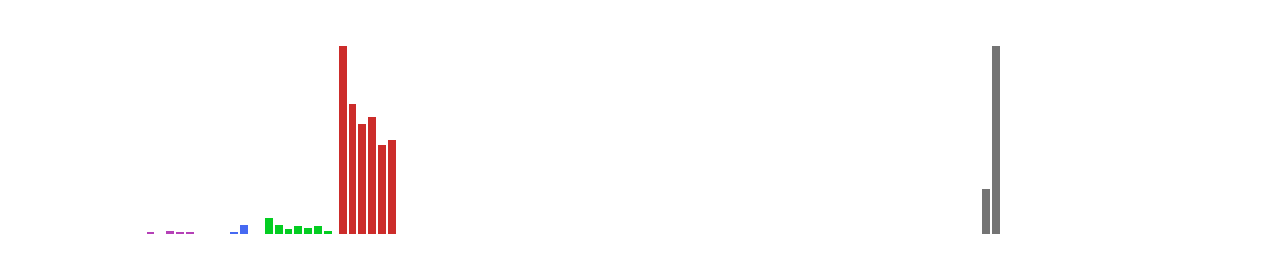

In [49]:
plotName = 'test'

# foxq2 = S specific;

# genelist = ['wrb','get4'] # disrupts photoreceptors synapses (Danielle, 2016)
# genelist = ['pappaa','igf2bp2b'] # In Miller, 2018 model pappaa cleaves igf-bp to increase igf1 availability. unfortunately, this is supposed to bind mRNA not IGF itself
# genelist = ['gpx1a','gpx1b','gpx4a','gpx4b']
# genelist = ['rgs9bp','RGS9BP']
# genelist = ['chchd1','chchd10']
# genelist = ['yipf6','yipf1','meis1b','pbx1a']
# genelist = ['sema3fb','sema3fa','sema6d']
# genelist = ['esama','esamb']
# genelist = ['il34','il7r']
# genelist = ['cxxc4','cxxc1a']
# genelist = ['mbd3b','mbd3a']
# genelist = ['cdr2a','cdr2l']
# genelist = ['coro6','coro2a','coro1ca']
# genelist = ['auts2a','auts2b']
# genelist = ['plxnb1a','plxna2']
# genelist = ['cux1a','cux1b','cux2b']
# genelist = ['arih1','arih2','arih1l']
# genelist = ['crhbp','crhr2','crhr1']
# genelist = ['chn1','chn2']
# genelist = ['robo1','robo2','robo3','robo4'] #nothing here
# genelist = ['ntng1a','ntng2a','ntng2b'] #low counts but interesting. Netrins are important for RGC axons going towards optic disc. ntng2b in mouse mediates rod-hc recognition!
# genelist = ['fat1a','fat1b','yap1','scrib','cc2d2a'] #fat1 important for renal development along yap1/hippo and scribble; cc2d2a involved in cilium development
# genelist = ['c1qbp','c1qa','c1qb'] #keep this in mind. Beth Stevens work shows that microglia engulf synapses through activation by c1q; maybe c1qbp is produced in healthy cells (inside mitochondria) to keep c1q bound and gets released upon damage.
# genelist = ['cc2d2a','rab8'] #Bahcman 2011: cc2d2a-/- causes Joubert syndrom. Important for cilium development by association with rab8. Not expressed in adults?
# genelist = ['per2','per3']
# genelist = ['gpsm2','gpsm1b','gpr107','gpr108'] #
# genelist = ['tbx2a','tbx2b','gdf6a','cnbpa','egr1', 'ndrg1a','ndrg1b'] # fate genes

#Hensley, 2011 smarca4
# genelist = ['smarca4a','guk1a','guk1b','dtnbp1a','elovl4b','id2b','ckmt2a','ckmt2b','aanat2','pbx1a'] #smarca4 regulated genes: follow up elovl4b, ckmt2a/b, pbx1a
# genelist = ['nme2a','nme3',''] #smarca4 regulated genes: follow up elovl4b, ckmt2a/b, pbx1a

# genelist = ['adgrl3.1','ntng2a','ntng2b'] #low counts but interesting. 
# genelist = ['cplx4a','cplx4b','cplx4c'] #low counts but interesting. 

# genelist = ['frmpd2', 'lrit3a'] #low counts but interesting. 
genelist = ['si:busm1-57f23.1 ', 'mhc1uba','serinc2'] # 

# genelist = ['ccdc28a','ccdc25','ccdc173','sox6','prdm9','prdm1b']

# genelist = ['per2','bhlhe40','nr1d2b','tefa','aanat2','aanat1'] #circadian genes. Correlate with collection time?

# genelist = ['elovl4b','elovl8a'] #a cone specific gene. 
# genelist = ['pbx1a','egr1','egr3','egr4'] # fishing for new targets
# genelist = ['foxg1b','foxq2','foxo3b','lmo4b','nfia'] # fishing for new targets
# genelist = ['anxa13','prdx5','mpp5b','mpp6a','serpina10a'] # fishing for new targets
# genelist = ['rbp4l','rbp3','impg1a','impg2b','ntm'] # fishing for new targets
# genelist = ['tapt1b','tapt1a','frmpd2','wdr37','fabp7a','tle3a'] # fishing for new targets
# genelist = ['ankrd33aa','ankrd33ab','dhx32a','dhx32b','wdr17']


# genelist = ['slc1a8a','slc1a8b','slc1a4','slc1a7a'] # EAATs (glutamate uptake)
# genelist = ['pmela','slc6a6b','naa35','ush2a'] # sex-associated rod genes in Sun, 2018 (all enriched in females, except pmela)

# genelist = ['pcloa','pclob']
# genelist = ['mtdha','mtdhb']
# genelist = ['igsf9b','igsf21a','igsf21b']
# genelist = ['rx3','lin9','igsf21b','foxq2','foxo3b','foxg1b','rxrga','smad5']
# genelist = ['sall1a','sall1b','sall2','sall4']
# genelist = ['rbm8a','rbm39a','rbm39b','rbmx','rbm22','rbm5']
# genelist = ['rbm5','rbm4.1','rbm4.2']
# genelist = ['kif5ba','kif1aa','kif1ab','kif1bp'] #kif5-/- : Charcot-MarieTooth; Campbell 2013: kif5s in all retinal layers, but only kif5ba and bb are in ONL
# genelist = ['kif3a','kif3b','kif16ba','kif19','kif25'] #
# genelist = ['robo2','slit1a','nbeaa','prdm1b'] #


# genelist = ['pcdh2ab9','pcdh2g28','pcdh15a','pcdh15b','pcdh11','pcdh10a'] #interesting ones
# plotName = 'pcdhs'

# genelist = ['sema7a','sema6d','sema3fb','sema3fa','sema4ab','sema4ba'] #the good ones
# genelist = ['sema6a','sema3aa','sema6e','sema5bb','sema4c','sema6bb','sema6dl','sema5ba'] # the inconsistent ones
# genelist = ['sema6ba','sema5a','sema3c','sema3b','sema3e','sema3d','sema3h','sema3ab','sema4e','sema4aa','sema3gb','sema3ga','sema4bb','sema3bl','sema4ga','sema4gb'] # the negative ones

# genelist = ['ncdn','flrt3'] 
# genelist = ['odf2a','odf2b']
# genelist = ['syne1a','syne1b','syne2b','syne3']
# genelist = ['rasgrf2a','rasgrf2b']
# genelist = ['rasgrf2a','rasgrf2b','nmnat2','rbx1','nrf1','unc119.2','unc119b'] # involved in migration

# genelist = ['syt5a','syt5b','syt1a','syt1b','syt14a']


# genelist = ['myo19','myo16','myo7bb','myo5b','myo1cb','myo5aa','myo7aa','myo6a','myo6b']
# genelist = ['fgfr1op','fgfr1op2','fgf1b','fgf13a','fgf11b']
# genelist = ['prdm1b','fgfr1op2']
# genelist = ['frmpd1a','gpsm2'] # Ulisse + Pahlberg: these proteins inteact with rod transducin 

# genelist = ['epha7','frmpd2','pkp4','chd7','hook1']
# genelist = ['thrb','samd7','samd1a','samd11','dscaml1'] #samd11:https://www.ncbi.nlm.nih.gov/pubmed/27734943
# genelist = ['thrb','nrl']
# genelist = ['opn3','opn4.1','opn4a','opn4b','opn5','opn6a','opn9'] #
            
fH, axes = plt.subplots(1,len(genelist),sharey=False,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
#     if  i == 0:
    formatFigure(g, fH, axes[i], pH)
#     else:
#         formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
fH.tight_layout()

***
## heatMap: photoreceptors, rods, Müller Glia, microglia<a id='heatOther'>∮</a>
***
[Back to Index](#Index)

In [144]:
geneTag = 'ddr'
gdf = findgenelist(geneTag)
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf[gdf.baseMean > 0]
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([4,24])
gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf.sort_values(by=["padj"])

rdf = findgenelist_rods(geneTag)
rdf = rdf.sort_values(by=["symbol"])
# rdf = rdf[rdf.baseMean > 0]

mdf = findgenelist_glia(geneTag)
mdf = mdf.sort_values(by=["symbol"])
# mdf = mdf[mdf.baseMean > 0]

sqdf = findgenelist_sqcones(geneTag)
sqdf = sqdf.sort_values(by=["symbol"])
# sqdf = sqdf[sqdf.baseMean > 0]

hcdf = findgenelist_haircell(geneTag)
hcdf = hcdf.sort_values(by=["symbol"])
# hcdf = hcdf[hcdf.baseMean > 0]
gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,pvalue,padj,R1,R2,R3,...,M4,M5,M6,S7,L1,L2,L3,L4,L5,L6
1,ddr1,discoidin domain receptor tyrosine kinase 1,0.107841,-1.344869e-07,0.001443,0.749327,NaN,0.0,0.0,0.000000,...,0.000000,0.028228,0.000000,3.115409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ddr2a,discoidin domain receptor tyrosine kinase 2a,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ddr2b,discoidin domain receptor tyrosine kinase 2b,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ddr2l,discoidin domain receptor family member 2 like,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,ddrgk1,DDRGK domain containing 1,2.331729,1.023340e-06,0.001443,0.562077,0.780516,0.0,0.0,3.608857,...,1.389218,4.113685,2.724777,1.302284,2.138242,2.244284,2.287158,5.237563,1.852901,2.247094


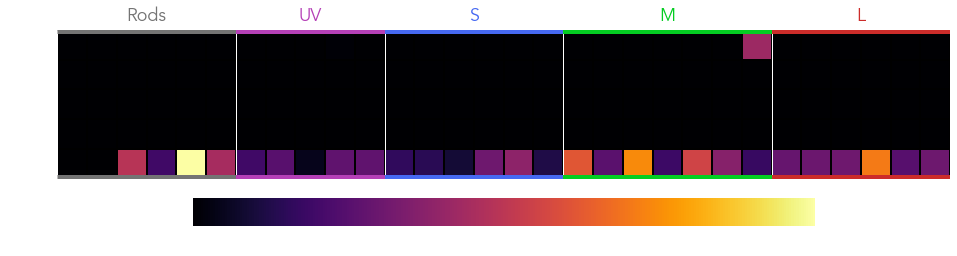

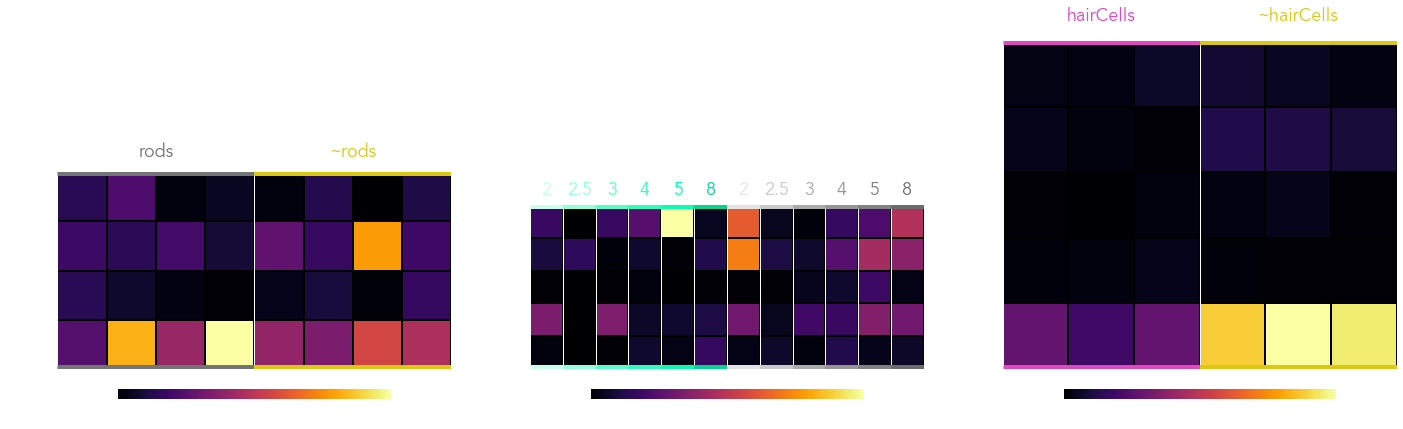

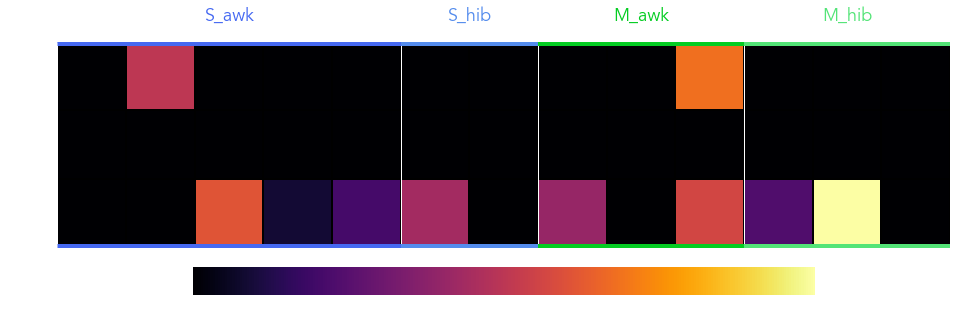

In [145]:
plotName = 'test'
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = gdf.iloc[0:,7:37].values
fig, ax = plt.subplots(figsize=[16,16])
im, cbar = heatmap(data, genenames, samplenames, ax=ax)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.show()


genenamesr = rdf['symbol'].values
samplenamesr = [] #skipping names to replace in intaglio
datar = rdf.iloc[0:,7:16]
genenamesm = mdf['symbol'].values
samplenamesm = [] #skipping names to replace in intaglio
datam = mdf.iloc[0:,5:41]
genenameshc = mdf['symbol'].values
samplenameshc = [] #skipping names to replace in intaglio
datahc = hcdf.iloc[0:,2:8]

figr, (axr,axm, axhc) = plt.subplots(1,3,figsize=[24,16])
# figr = plt.figure(figsize=[16,2],constrained_layout=True)
# fig_grid = figr.add_gridspec(1,28)
# axr = figr.add_subplot(fig_grid[0,0:8])
# axm = figr.add_subplot(fig_grid[0,9:])
imr, cbarr = heatmap_rods(datar, genenamesr, samplenamesr, ax=axr)
imm, cbarm = heatmap_glia(datam, genenamesm, samplenamesm, ax=axm)
imhc, cbarhc = heatmap_haircell(datahc, genenameshc, samplenameshc, ax=axhc)
plt.show()


genenamessq = sqdf['symbol'].values
samplenamessq = [] #skipping names to replace in intaglio
datasq = sqdf.iloc[0:,8:21]
figsq, axsq = plt.subplots(figsize=[16,16])
imsq, cbarsq = heatmap_sqcones(datasq, genenamessq, samplenamessq, ax=axsq)
plt.show()


In [ ]:
# genenames = gdf['symbol'].values
# samplenames = [] #skipping names to replace in intaglio
# data = gdf.iloc[0:,7:37].values

# genenamesr = rdf['symbol'].values
# samplenamesr = [] #skipping names to replace in intaglio
# datar = rdf.iloc[0:,7:16]
# genenamesm = mdf['symbol'].values
# samplenamesm = [] #skipping names to replace in intaglio
# datam = mdf.iloc[0:,5:41]

# genenamessq = sqdf['symbol'].values
# samplenamessq = [] #skipping names to replace in intaglio
# datasq = sqdf.iloc[0:,8:21]

# figr = plt.figure(figsize=[8,24],constrained_layout=True)
# fig_grid = figr.add_gridspec(3,2)
# ax = figr.add_subplot(fig_grid[0,:])
# axr = figr.add_subplot(fig_grid[1,0])
# axm = figr.add_subplot(fig_grid[1,1])
# axsq = figr.add_subplot(fig_grid[2,:])
# # axm = plt.subplot(2,2,2)
# im, cbar = heatmap(data, genenames, samplenames, ax=ax,cmap="inferno", cbarlabel="fpkm")
# imr, cbarr = heatmap_rods(datar, genenamesr, samplenamesr, ax=axr, cmap="inferno", cbarlabel="cpm")
# imm, cbarm = heatmap_glia(datam, genenamesm, samplenamesm, ax=axm, cmap="inferno", cbarlabel="tmm")
# imsq, cbarsq = heatmap_sqcones(datasq, genenamessq, samplenamessq, ax=axsq, cmap="inferno", cbarlabel="counts")

# plt.show()

***
## sparkline plot for markdown file<a id='sparkline'>∮</a>
***
[Back to Index](#Index)

In [113]:
genename = 'grk7a'
n,h = plotBars(genename)
fH, ax = plt.subplots(figsize=[2.25,.25])
ax.axhline(y = np.mean(h), color = 'white', linewidth = .2, alpha = 1, solid_capstyle='butt', zorder = 0)
pH = ax.bar(n, h, width=.8, bottom=None, align='center', data=None, color=pC['plt'], zorder = 1)
ax.text(.90, 1, genename,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=7, zorder = 0)
ax.text(.97, 0.2, (np.around(np.mean(h),decimals=0)),horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=6, zorder = 0)
ax.set_axis_off()
# plt.savefig("/Users/angueyraaristjm/Documents/LiMolec/zfGenotyping/targetGenes/202001_zfDEGs/resources/{0}.svg".format(genename), transparent=True, format="svg")

In [ ]:
'{0}fpkm'.format(np.around(np.mean(h),decimals=0))

In [ ]:
# genename = 'kcnk1'
# n,h = plotBars_sqcones(genename)
# fH, ax = plt.subplots(figsize=[2.2,.25])
# ax.axhline(y = np.mean(h), color = 'white', linewidth = .2, alpha = 1, solid_capstyle='butt')
# pH = ax.bar(n, h, width=.8, bottom=None, align='center', data=None, color=sqC['plt'])
# ax.text(.92, 1, genename,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=6)
# ax.text(.97, 0.2, (np.around(np.mean(h),decimals=0)),horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=4)
# ax.set_axis_off()
# plt.savefig("/Users/angueyraaristjm/Documents/LiMolec/zfGenotyping/targetGenes/202001_zfDEGs/resources/{0}sq.svg".format(genename), transparent=True, format="svg")

***
## PCA <a id='pca'>∮</a>
***
[Back to Index](#Index)

### This is supposed to run only once. Creates sparklines and a markdown file with entries for these genes

In [11]:
# deseqdir= "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_rodsVcones/"
# fname = "fromPython_PCgenes_RvC_fromPython.md"

# deseqdir= "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_USvsLM/"
# fname = "fromPython_PCgenes_USvLM.md"

# deseqdir= "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_LvsM/"
# fname = "fromPython_PCgenes_LvM.md"

deseqdir= "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_UvsS/"
fname = "fromPython_PCgenes_UvS.md"



pcadir= "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/PCA_genes/"
%cd {pcadir}
pcr = pd.read_csv(deseqdir + "pcaWeights.csv")
pcr.sort_values(by=['PC1'])
pcr

/Users/angueyraaristjm/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/PCA_genes


,symbol,genename,PC1,PC2,PC3
0,myl4,myosin light chain 4 alkali; atrial embryonic,-0.044923,0.035854,0.002460
1,gad1b,glutamate decarboxylase 1b,-0.031954,0.015379,-0.002666
2,map1b,microtubule-associated protein 1B,-0.031623,0.006472,0.004211
3,st13,ST13 Hsp70 interacting protein,-0.031257,-0.002920,0.012281
4,ttyh2l,tweety homolog 2 like,-0.030700,0.024868,0.006399
...,...,...,...,...,...
22920,chkb,choline kinase beta,0.029957,-0.022605,0.007433
22921,foxq2,forkhead box Q2,0.035475,-0.032211,0.008420
22922,prss23,serine protease 23,0.036095,-0.030888,0.000921
22923,fkbp5,FKBP prolyl isomerase 5,0.039627,0.004621,-0.013197


In [118]:
# Sparkline plots
genename = 'syt5b'
n,h = plotBars(genename)
fH, ax = plt.subplots(figsize=[2.25,.25])
ax.axhline(y = np.mean(h), color = 'white', linewidth = .2, alpha = 1, solid_capstyle='butt', zorder = 0)
pH = ax.bar(n, h, width=.8, bottom=None, align='center', data=None, color=pC['plt'], zorder = 1)
ax.text(.90, 1, genename,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=7, zorder = 0)
ax.text(.97, 0.2, (np.around(np.mean(h),decimals=0)),horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=6, zorder = 0)
ax.set_axis_off()
plt.savefig("./resources/{0}.svg".format(genename), transparent=True, format="svg")

In [ ]:

# nTop = 100;
# print("Started...")
# for i in range(nTop):
#     genename = pcr['symbol'].iloc[i]
#     if os.path.isfile("./resources/{0}.svg".format(genename)) == False:
#         n,h = plotBars(genename)
#         fH, ax = plt.subplots(figsize=[2.25,.25])
#         ax.axhline(y = np.mean(h), color = 'white', linewidth = .2, alpha = 1, solid_capstyle='butt', zorder = 0)
#         pH = ax.bar(n, h, width=.8, bottom=None, align='center', data=None, color=pC['plt'], zorder = 1)
#         ax.text(.90, 1, genename,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=7, zorder = 0)
#         ax.text(.97, 0.2, (np.around(np.mean(h),decimals=0)),horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=6, zorder = 0)
#         ax.set_axis_off()
#         plt.savefig("./resources/{0}.svg".format(genename), transparent=True, format="svg")
#         plt.close(fH)
# print("Up plots created...")

# for i in -np.add(range(nTop),1):
#     genename = pcr['symbol'].iloc[i]
#     if os.path.isfile("./resources/{0}.svg".format(genename)) == False:
#         n,h = plotBars(genename)
#         fH, ax = plt.subplots(figsize=[2.25,.25])
#         ax.axhline(y = np.mean(h), color = 'white', linewidth = .2, alpha = 1, solid_capstyle='butt', zorder = 0)
#         pH = ax.bar(n, h, width=.8, bottom=None, align='center', data=None, color=pC['plt'], zorder = 1)
#         ax.text(.90, 1, genename,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=7, zorder = 0)
#         ax.text(.97, 0.2, (np.around(np.mean(h),decimals=0)),horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=6, zorder = 0)
#         ax.set_axis_off()
#         plt.savefig("./resources/{0}.svg".format(genename), transparent=True, format="svg")
#         plt.close(fH)
# print("Down plots created...")
        
# fid = open(fname, 'w+t') 
# fid.write("_________________________________________________________\n")
# fid.write("## Top " + str(nTop) + " genes enriched in rods \n\n\n")
# for i in range(nTop):
#     fid.write("#### _" + pcr['symbol'].iloc[i] + "_ ![" + pcr['symbol'].iloc[i] + "](./resources/" + pcr['symbol'].iloc[i] + ".svg)\n")
#     fid.write("- _" + str(pcr['genename'].iloc[i]) + "_\n")
#     fid.write("- [ ] &#10060;?&#9989;?&#8505;?&#9770;? RANK = " + str(i+1) + " ![R](./resources/R.svg)\n")
#     fid.write("- [ZFIN link]()" + "\n")
#     fid.write("- NOTESHERE" + "\n")
#     fid.write("\n")


# fid.write("_________________________________________________________\n")
# fid.write("## Top " + str(nTop) + " genes enriched in cones \n\n\n")
# for i in -np.add(range(nTop),1):
#     fid.write("#### _" + pcr['symbol'].iloc[i] + "_ ![" + pcr['symbol'].iloc[i] + "](./resources/" + pcr['symbol'].iloc[i] + ".svg)\n")
#     fid.write("- _" + str(pcr['genename'].iloc[i]) + "_\n")
#     fid.write("- [ ] &#10060;?&#9989;?&#8505;?&#9770;? RANK = " + str(-i) + " ![Cs](./resources/Cs.svg)\n")
#     fid.write("- [ZFIN link]()" + "\n")
#     fid.write("- NOTESHERE" + "\n")
#     fid.write("\n")

# fid.close()


# print("MD file created. ")

In [ ]:
help(plt.subplots_adjust)

In [ ]:
# histogram of PC weights
pcr.sort_values(by=['PC1'])
a = pcr['PC1']
# a = np.divide(a,pcr['PC1'].sum())
a = a[a != 0] #there are too many nil-values
fH, ax = plt.subplots(figsize=[12,6])
n, h, patches = ax.hist(np.multiply(a,100), bins=100, log=True) #use bins='fd' for optimal binning

***
## misc. things<a id='misc'>∮</a>
***
[Back to Index](#Index)

#### Adding genenames to pcaWeights and using opportunity to sort by PC1 value and remove NaN

In [ ]:
deseqdir= "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2"
# pcr = pd.read_csv(deseqdir + "/00_rodsVcones/pcaWeights_Rout.csv")
# pcr = pd.read_csv(deseqdir + "/00_USvsLM/pcaWeights_Rout.csv")
# pcr = pd.read_csv(deseqdir + "/00_LvsM/pcaWeights_Rout.csv")
pcr = pd.read_csv(deseqdir + "/00_UvsS/pcaWeights_Rout.csv")
# pcr.head
gdf = pd.read_csv(deseqdir + "/00_rodsVcones/rodVCones_fpkm.csv")
pcr = pcr.set_index('symbol')
pcr = pcr.reindex(index=gdf['symbol'])
pcr = pcr.reset_index()
pcr.insert(1,'genename',gdf['genename'],True)
pcr.dropna(subset=['PC1'], inplace=True)
pcr.sort_values(by=['PC1'], inplace=True)
# pcr.to_csv(path_or_buf=deseqdir + "/00_rodsVcones/pcaWeights.csv", index=False)
# pcr.to_csv(path_or_buf=deseqdir + "/00_USvsLM/pcaWeights.csv", index=False)
# pcr.to_csv(path_or_buf=deseqdir + "/00_LvsM/pcaWeights.csv", index=False)
# pcr.to_csv(path_or_buf=deseqdir + "/00_UvsS/pcaWeights.csv", index=False)
pcr

In [ ]:
help(gdf.to_csv)

### Trying to draw counts for single gene by wedges in a circle 
> Prob not worth it, difficult to interpret

In [ ]:
fig, ax = plt.subplots(figsize=[12,12])

n = 30;
r = 0;
wdg_theta = 360/30;

patches = []
circles = []

pM = matplotlib.patches.Wedge(0, np.mean(data[r,0:6]), wdg_theta * (0), (wdg_theta * (6)), edgecolor="none", facecolor = pC['r'], alpha = 0.4)
patches.append(pM)

pM = matplotlib.patches.Wedge(0, np.mean(data[r,7:11]), wdg_theta * (6), (wdg_theta * (11)), edgecolor="none", facecolor = pC['u'], alpha = 0.4)
patches.append(pM)

pM = matplotlib.patches.Wedge(0, np.mean(data[r,12:17]), wdg_theta * (11), (wdg_theta * (17)), edgecolor="none", facecolor = pC['s'], alpha = 0.4)
patches.append(pM)

pM = matplotlib.patches.Wedge(0, np.mean(data[r,18:24]), wdg_theta * (17), (wdg_theta * (24)), edgecolor="none", facecolor = pC['m'], alpha = 0.4)
patches.append(pM)

pM = matplotlib.patches.Wedge(0, np.mean(data[r,25:30]), wdg_theta * (24), (wdg_theta * (30)), edgecolor="none", facecolor = pC['l'], alpha = 0.4)
patches.append(pM)

for i in range(n):
    p = matplotlib.patches.Wedge(0, data[r,i], wdg_theta * (i), (wdg_theta * (i+1)) -2, edgecolor="none", facecolor = pC['plt'][i], alpha = 0.4)
    patches.append(p)

for i in [0.001,.2,.4,.6,.8,1]:
    c = matplotlib.patches.Circle((0,0), np.max(data[r,:])*i, edgecolor = '#000000', facecolor='none', alpha=0.59)
    circles.append(c)

plt.xlim(-np.max(data[r,:])*1, np.max(data[r,:])*1)
plt.ylim(-np.max(data[r,:])*1, np.max(data[r,:])*1)


circleColl = matplotlib.collections.PatchCollection(circles, match_original=True);
ax.add_collection(circleColl)

patchColl = matplotlib.collections.PatchCollection(patches, match_original=True);
ax.add_collection(patchColl)


In [ ]:
np.max(data[r,:])

In [ ]:
np.max(data[4,i])

In [ ]:
data

In [ ]:
range(0,4)

In [ ]:
range?

### From 2019, Whitaker ,..., Swaroop
> genes involved in rod synapse size and localization

> [link to biorXiv](https://www.biorxiv.org/content/biorxiv/early/2019/08/30/753012.full.pdf)

In [ ]:
plotName = "test"

# gdf = findgenelist('dpf') # dpf3 -> not this one but dpf2 in all photoreceptors
# gdf = findgenelist('epb') # epb4.1l2 -> not this one but some interesting patterns in this family
# gdf = findgenelist('grtp') # grtp1 -> this one is interesting!
# gdf = findgenelist('kcnj') # kncj14 -> squirrel too but not zebrafish
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)

# gdf = findgenelist('llgl') # llgl2 -> nope
# gdf = findgenelist('rab') # rab28 -> nope; this family is too big
# gdf = gdf[gdf.baseMean > 2]
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)

# gdf = findgenelist('rom1') #rom1 -> rod-specific; what about outer segments?

# gdf = findgenelist('arl') # arl2bp -> nope but arl3l2 in all photoreceptors, and arl3l1 downregulated in uv and s. Both confirmed eye specific (https://zfin.org/ZDB-GENE-040426-1678; https://zfin.org/ZDB-GENE-040426-1649)
# These genes are supponsed to interact with unc119c (https://www.ncbi.nlm.nih.gov/pubmed/27079236) and act as their GDF
# gdf = gdf[gdf.baseMean > 5]
# # gdf = gdf[gdf.baseMean < 300]
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)

# gdf = findgenelist('unc119') # unc119c is photoreceptor specific (https://www.ncbi.nlm.nih.gov/pubmed/27079236) and CoIPs with arl3l2


gdf = findgenelist('ppar') #ppargc2
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')
# gdf = findgenelist('dpf')

### https://www.sciencedirect.com/science/article/pii/S2211124718303218
# gdf = findgenelist('frmpd') #frmpd2 interacts with lrit1 in cones 
# gdf = findgenelist('sdc') #sdcbp interacts with lrit 1
# gdf = findgenelist('grip') #grip1 interacts with lrit1

# gdf = findgenelist('dpf')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([0])
# gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf[gdf.baseMean > .45]

gdf


In [ ]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
log2matrix = np.vectorize(log2)
# data = log2matrix(gdf.iloc[0:,7:15].values)
data = gdf.iloc[0:,7:37].values


fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="fpkm")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
# gdf = gdf[gdf.baseMean > .45]